In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
birthweights = pd.read_csv('datasets/birthweights.csv')
birthweights.head()

,ID,weight,length,headcirc,gestation,smoker
0,1360,4.55,56,34,44,0
1,1016,4.32,53,36,40,0
2,462,4.10,58,39,41,0
3,1187,4.07,53,38,44,0
4,553,3.94,54,37,42,0


In [3]:
# 1. Gestation period by smoker
birthweights.groupby('smoker').describe()['gestation']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,20.0,39.450000,2.799906,33.0,38.0,40.0,41.0,44.0
1,22.0,38.954545,2.535036,33.0,38.0,39.0,40.0,45.0


In [4]:
#sns.__version__

In [5]:
#sns.displot(data=birthweights, x='weight', col='smoker')

In [6]:
stats.ttest_ind(birthweights[birthweights['smoker']==0]['weight'], birthweights[birthweights['smoker']==1]['weight'])

Ttest_indResult(statistic=2.093431541991207, pvalue=0.04269624654559367)

In [7]:
# Here's how you would get confidence interval

import statsmodels.stats.weightstats as ws

birthweights_ttest = ws.CompareMeans(ws.DescrStatsW(birthweights[birthweights['smoker']==0]['weight']), 
                                ws.DescrStatsW(birthweights[birthweights['smoker']==1]['weight']))

birthweights_ttest.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.3754,0.179,2.093,0.043,0.013,0.738


In [8]:
# 2. Correlation matrix
birthweights[['weight', 'length', 'headcirc', 'gestation']].corr()

,weight,length,headcirc,gestation
weight,1.000000,0.726833,0.684616,0.708303
length,0.726833,1.000000,0.563172,0.705111
headcirc,0.684616,0.563172,1.000000,0.404635
gestation,0.708303,0.705111,0.404635,1.000000


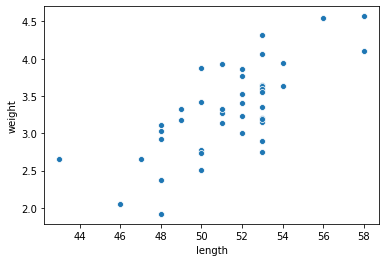

In [9]:
# 3. Weight vs length
sns.scatterplot(x='length', y='weight', data=birthweights)

In [10]:
# 4. Regress ht on wt
stats.linregress(birthweights['length'], birthweights['weight'])

LinregressResult(slope=0.14951886792452834, intercept=-4.3624447439353125, rvalue=0.7268334847885263, pvalue=5.0293461366559236e-08, stderr=0.02233932464816593)

In [11]:
# Here's how you get the R square etc

Y = birthweights['weight']
X = birthweights[['length']]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [12]:
regr.intercept_

-4.362444743935308

In [13]:
regr.coef_

array([0.14951887])

In [14]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     44.80
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           5.03e-08
Time:                        12:28:15   Log-Likelihood:                -22.127
No. Observations:                  42   AIC:                             48.25
Df Residuals:                      40   BIC:                             51.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3624      1.149     -3.798      0.000      -6.684      -2.041
length         0.1495      0.022      6.693      0.000       0.104       0.195
==============================================================================
Omnibus:                        0.686   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.746
Skew:                          -0.126   Prob(JB):                        0.689
Kurtosis:                       2.398   Cond. No.                         912.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# 4. Train/test
X_train, X_test, y_train, y_test = model_selection.train_test_split(birthweights[['length']], birthweights[['weight']], random_state=1234)

In [16]:
y_train.shape

(31, 1)

In [17]:
# This may not be a good idea to split...
y_test.shape

(11, 1)

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Print first five observations 
y_pred[:5]

array([[3.57032272],
       [3.57032272],
       [3.72498945],
       [2.79698903],
       [3.41565598]])

In [19]:
# Get the training model coefficients
regr.coef_

array([[0.15466674]])

In [20]:
metrics.r2_score(y_test, y_pred)

0.1803273071527166

In [21]:
metrics.mean_squared_error(y_test, y_pred)

0.15084145277825645